In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('ipl.csv')
df.shape

(76014, 15)

In [49]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [50]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [51]:
integer_features = [feature for feature in df if df[feature].dtype != 'O']
integer_features

['mid',
 'runs',
 'wickets',
 'overs',
 'runs_last_5',
 'wickets_last_5',
 'striker',
 'non-striker',
 'total']

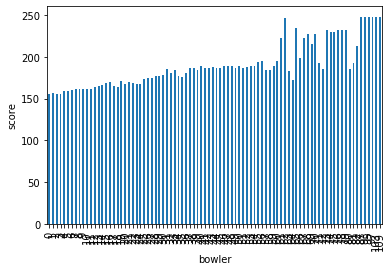

In [33]:
_data = df.copy()
_data.groupby(df['non-striker'])['total'].median().plot.bar()
plt.xlabel(feature)
plt.ylabel('score')
plt.show()

In [52]:
categorical_features = [feature for feature in df if df[feature].dtype == 'O']
categorical_features

['date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']

Convert date to date time  as we are considering it to split data into train test

In [53]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df['date']

0       2008-04-18
1       2008-04-18
2       2008-04-18
3       2008-04-18
4       2008-04-18
           ...    
76009   2017-05-21
76010   2017-05-21
76011   2017-05-21
76012   2017-05-21
76013   2017-05-21
Name: date, Length: 76014, dtype: datetime64[ns]

check the relation between 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler' on the final score


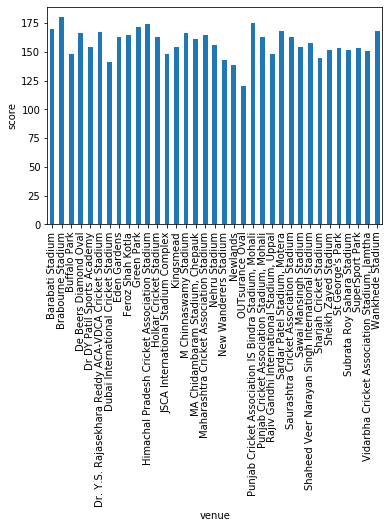

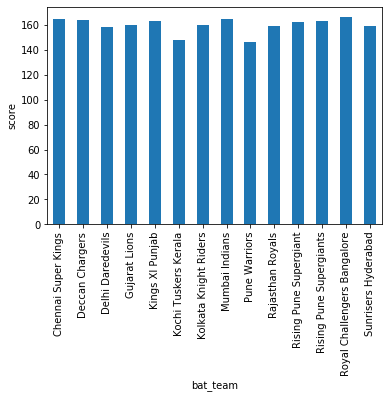

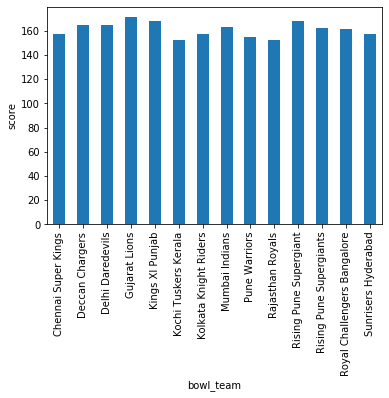

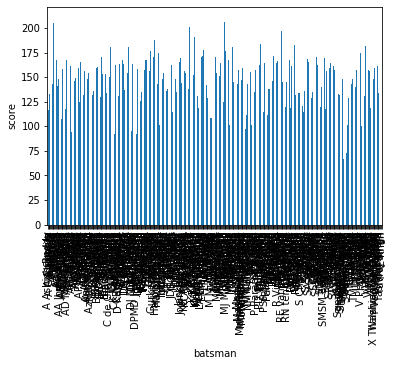

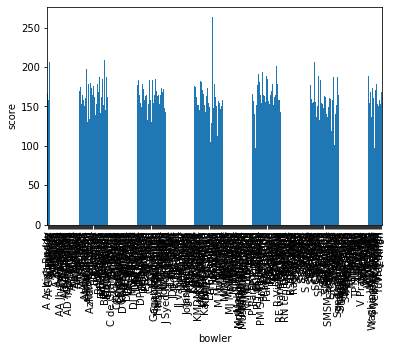

In [36]:
rel_data = df[['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']]

for feature in rel_data:
    data = df.copy()
    data.groupby(feature)['total'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('score')
    plt.show()

We can see that the median scores vary according to these variables. S0, we are considering them for our model

In [54]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


taking overs greater than 5 only

In [55]:
df = df[df['overs'] >= 5]
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
32,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,59,0,41,10,222
33,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2,59,1,41,10,222
34,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.3,59,1,41,0,222
35,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.4,59,1,41,0,222
36,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.5,58,1,41,0,222


In [56]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
32,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,59,0,41,10,222
33,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2,59,1,41,10,222
34,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.3,59,1,41,0,222
35,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.4,59,1,41,0,222
36,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.5,58,1,41,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [57]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
32,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,59,0,41,10,222
33,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2,59,1,41,10,222
34,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.3,59,1,41,0,222
35,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.4,59,1,41,0,222
36,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.5,58,1,41,0,222


In [58]:
df.shape

(56707, 15)

In [59]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [60]:
df = pd.get_dummies(data = df)
df.head()

,mid,date,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,...,bowler_WPUJC Vaas,bowler_Washington Sundar,bowler_Y Gnaneswara Rao,bowler_Y Nagar,bowler_Y Venugopal Rao,bowler_YA Abdulla,bowler_YK Pathan,bowler_YS Chahal,bowler_Yuvraj Singh,bowler_Z Khan
32,1,2008-04-18,61,0,5.1,59,0,41,10,222,...,0,0,0,0,0,0,0,0,0,1
33,1,2008-04-18,61,1,5.2,59,1,41,10,222,...,0,0,0,0,0,0,0,0,0,1
34,1,2008-04-18,61,1,5.3,59,1,41,0,222,...,0,0,0,0,0,0,0,0,0,1
35,1,2008-04-18,61,1,5.4,59,1,41,0,222,...,0,0,0,0,0,0,0,0,0,1
36,1,2008-04-18,61,1,5.5,58,1,41,0,222,...,0,0,0,0,0,0,0,0,0,1


In [85]:
X_train = df.drop('total', axis = 1)[df['date'].dt.year <= 2016]
X_test = df.drop('total', axis = 1)[df['date'].dt.year >= 2017]
X_train.head()

,mid,date,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,venue_Barabati Stadium,...,bowler_WPUJC Vaas,bowler_Washington Sundar,bowler_Y Gnaneswara Rao,bowler_Y Nagar,bowler_Y Venugopal Rao,bowler_YA Abdulla,bowler_YK Pathan,bowler_YS Chahal,bowler_Yuvraj Singh,bowler_Z Khan
32,1,2008-04-18,61,0,5.1,59,0,41,10,0,...,0,0,0,0,0,0,0,0,0,1
33,1,2008-04-18,61,1,5.2,59,1,41,10,0,...,0,0,0,0,0,0,0,0,0,1
34,1,2008-04-18,61,1,5.3,59,1,41,0,0,...,0,0,0,0,0,0,0,0,0,1
35,1,2008-04-18,61,1,5.4,59,1,41,0,0,...,0,0,0,0,0,0,0,0,0,1
36,1,2008-04-18,61,1,5.5,58,1,41,0,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
y_train = df['total'][df['date'].dt.year <= 2016].values
y_test = df['total'][df['date'].dt.year >= 2017].values

In [87]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [88]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
prediction = regressor.predict(X_test)
prediction

array([166.54854224, 168.95366969, 168.55618948, ..., 142.6139628 ,
       143.37508704, 135.91875667])

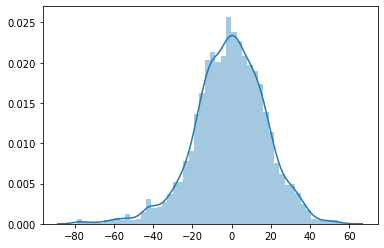

In [95]:
import seaborn as sns
sns.distplot(y_test - prediction)


In [99]:

from sklearn.metrics import mean_squared_error, r2_score
print('Coefficient of determination: %.2f'
      % r2_score(y_test, prediction))


print('Mean squared error: %.2f'
      % mean_squared_error(y_test, prediction))

Coefficient of determination: 0.62
Mean squared error: 329.13
